# User's Guide, Chapter 29: Spanners 1

In `music21`, a "Spanner" is a :class:`~music21.base.Music21Object` that denotes a relationship among other elements, such as Notes, Chords, or even Streams, which may or may not be separated in a hierarchy, such as `Note` objects in different measures.  They are used to encode things such as Slurs or lines or Ottava (8va) marks and even things like staff groupings.  Music would be dull if we could not cross the barline, and Spanners are the key to doing so successfully.

## Slurs

Let's create our first spanner, a simple slur between two notes in a measure.  We will use `TinyNotation` to quickly get a short part:

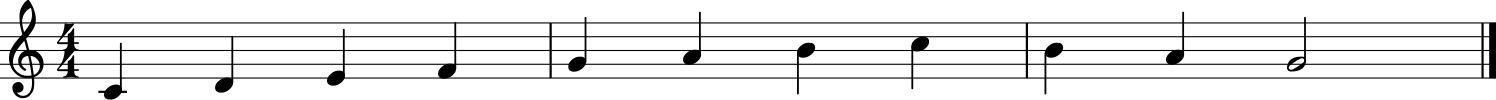

In [1]:
p = converter.parse("tinynotation: 4/4 c4 d e f g a b c' b a g2")
p.show()

Let's put a slur over the first two notes:

In [2]:
c = p.recurse().notes[0]
d = p.recurse().notes[1]
sl1 = spanner.Slur([c, d])
sl1

<music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>

Note a couple of things: the notes of the spanner should be enclosed in a grouping container such as a list or tuple and then passed into the Slur, usually when it is created.

If we look at the part, nothing has changed:

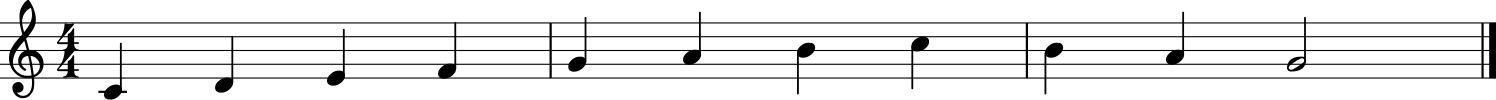

In [3]:
p.show()

Why not?  Well, we have a slur, but it's not part of the part yet.  So let's put it into the first measure.  By convention we put spanners at the beginning of a Stream, at offset 0.0.

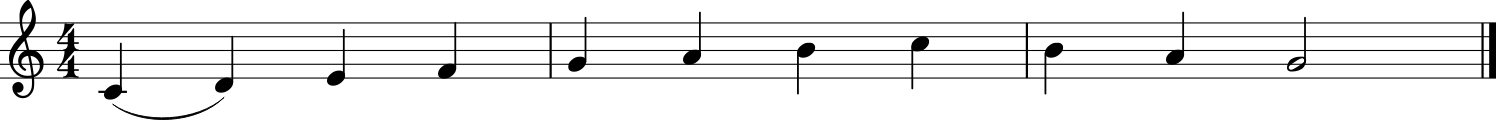

In [4]:
m1 = p.getElementsByClass('Measure')[0]
m1.insert(0.0, sl1)
p.show()

Ta-da! The slur is present and connects the first two notes.

But the power of the slur is that it can cross barlines.  So let's create another one from the F to the A.

In [5]:
m2 = p.getElementsByClass('Measure')[1]
f = m1.notes[-1]
g = m2.notes[0]
a = m2.notes[1]
sl2 = spanner.Slur([f, g, a])

Now we have a bit of a dilemma -- where to put this second slur?  Does it go in the measure of the first note? The measure of the last note? The part?  The answer is actually that it can go in any of these! It's just a question of where you want to find it later.  We'll put it in the Part:

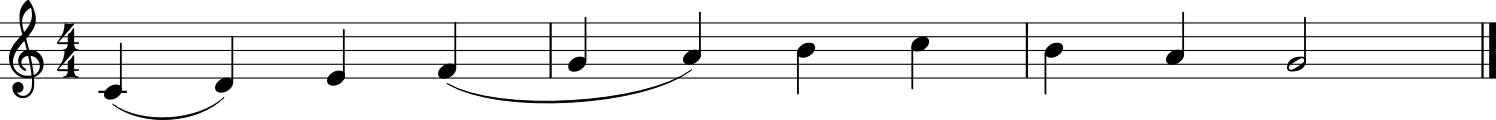

In [6]:
p.insert(0.0, sl2)
p.show()

Depending on what you want to use the spanner for, you might not need to include all the intermediary notes in a spanner.  For instance, let's slur the last four notes on the piece, specifying only the high C and the final G.  We'll put in the last measure.

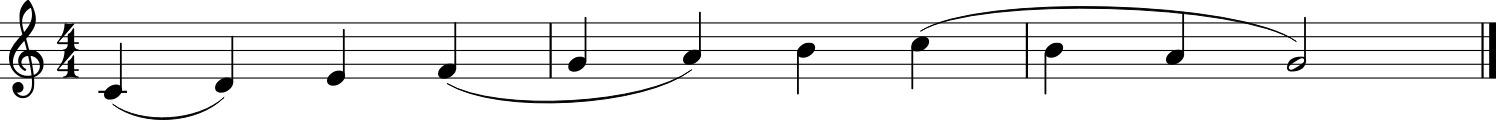

In [7]:
m3 = p.getElementsByClass('Measure')[2]
c2 = m2.notes[-1]
g2 = m3.notes[-1]
sl3 = spanner.Slur([c2, g2])
m2.insert(0, sl3)
p.show()